In [46]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


import seaborn as sns

In [14]:
blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [16]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [17]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

### Dummy Classifier

In [22]:
dummy = DummyClassifier(strategy="most_frequent")

cv_results = cross_validate(dummy, data, target, cv=10)
cv_results["test_score"].mean()

0.762054054054054

In [23]:
cv_results = cross_validate(dummy, data, target, cv=10, scoring="balanced_accuracy")
cv_results["test_score"].mean()

0.5

### KNN Clasifier

In [44]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_results = cross_validate(model, data, target, cv=10, return_train_score=True)
cv_results["test_score"].mean()

0.6527027027027026

/home/enrique/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/enrique/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


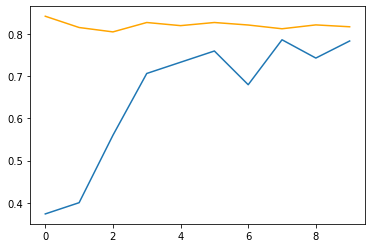

In [49]:
sns.lineplot(range(10),cv_results["test_score"])
sns.lineplot(range(10),cv_results["train_score"], c="orange")

In [36]:
cv_results

{'fit_time': array([0.03431058, 0.01845598, 0.01541567, 0.01541615, 0.01533771,
        0.01561141, 0.01530409, 0.01514268, 0.01653957, 0.0153904 ]),
 'score_time': array([0.02010894, 0.01576686, 0.01711178, 0.01667786, 0.01580906,
        0.01604557, 0.0156734 , 0.01661873, 0.01632142, 0.01623607]),
 'test_score': array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
        0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378])}

In [43]:
cv_results = cross_val_score(model, data, target, cv=10)
cv_results

array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
       0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378])

In [28]:
model = make_pipeline(KNeighborsClassifier())
cv_results = cross_validate(model, data, target, cv=10)
cv_results["test_score"].mean()

0.6673333333333333

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}